## turn stats

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
wind_grid = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')

In [5]:
geo_tools.find_closest_model_point(-123.24, 48.69, wind_grid['longitude'][:]-360, wind_grid['latitude'][:],
                                   grid = 'GEM2.5')

(116, 150)

In [6]:
wind_data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [7]:
time_slice = slice('2015-01-01 00:00:00', '2019-01-01 00:00:00')

In [8]:
u_winds = wind_data.u_wind.isel(gridY=116, gridX=150).sel(time=time_slice).data
v_winds = wind_data.v_wind.isel(gridY=116, gridX=150).sel(time=time_slice).data

In [9]:
times = wind_data.time.sel(time=time_slice).data

In [10]:
times.shape

(35065,)

In [11]:
u_winds.shape

(35065,)

In [12]:
wind_speed, wind_dir = wind_tools.wind_speed_dir(u_winds, v_winds)

In [13]:
times[:3]

array(['2015-01-01T00:00:00.000000000', '2015-01-01T01:00:00.000000000',
       '2015-01-01T02:00:00.000000000'], dtype='datetime64[ns]')

In [14]:
wnd_dir_avg = np.array([])
wnd_dir_min = np.array([])
wnd_dir_max = np.array([])
wnd_dir_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_dir_avg = np.append(wnd_dir_avg, wind_dir[start:end].mean())
    wnd_dir_min = np.append(wnd_dir_min, wind_dir[start:end].min())
    wnd_dir_max = np.append(wnd_dir_max, wind_dir[start:end].max())
    wnd_dir_std = np.append(wnd_dir_std, wind_dir[start:end].std())

In [15]:
wnd_spd_avg = np.array([])
wnd_spd_min = np.array([])
wnd_spd_max = np.array([])
wnd_spd_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_spd_avg = np.append(wnd_spd_avg, wind_speed[start:end].mean())
    wnd_spd_min = np.append(wnd_spd_min, wind_speed[start:end].min())
    wnd_spd_max = np.append(wnd_spd_max, wind_speed[start:end].max())
    wnd_spd_std = np.append(wnd_spd_std, wind_speed[start:end].std())

In [16]:
pickle_in1 = open("/home/abhudia/Desktop/current speed/hourly/mag2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/current speed/hourly/mag2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/current speed/hourly/mag2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/current speed/hourly/mag2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

In [17]:
two = np.append(example1[:,143,240], example2[:,143,240])
three = np.append(two, example3[:,143,240])
fullc = np.append(three, example4[:,143,240])
fullc.shape

(35064,)

In [18]:
dates2 = np.array([datetime.datetime(2015,1,1,0,30) + datetime.timedelta(hours = i) for i in range(35064)])

In [19]:
month_of_data = np.array([dates2[a].month for a in range(35064)])

In [20]:
cur_avg = np.array([])
cur_min = np.array([])
cur_max = np.array([])
cur_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    cur_avg = np.append(cur_avg, fullc[start:end].mean())
    cur_min = np.append(cur_min, fullc[start:end].min())
    cur_max = np.append(cur_max, fullc[start:end].max())
    cur_std = np.append(cur_std, fullc[start:end].std())

In [21]:
pickle_in1 = open("/home/abhudia/Desktop/salinity/3points/turn2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/salinity/3points/turn2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/salinity/3points/turn2017.pickle","rb")
pickle_in4 = open("/home/abhudia/Desktop/salinity/3points/turn2018.pickle","rb")
example1 = pickle.load(pickle_in1)
example2 = pickle.load(pickle_in2)
example3 = pickle.load(pickle_in3)
example4 = pickle.load(pickle_in4)

two = np.append(example1, example2)
three = np.append(two, example3)
fulls = np.append(three, example4)

In [22]:
sal_avg = np.array([])
sal_min = np.array([])
sal_max = np.array([])
sal_std = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    sal_avg = np.append(sal_avg, fulls[start:end].mean())
    sal_min = np.append(sal_min, fulls[start:end].min())
    sal_max = np.append(sal_max, fulls[start:end].max())
    sal_std = np.append(sal_std, fulls[start:end].std())

In [23]:
fullc.shape

(35064,)

In [24]:
wind_dir.shape

(35065,)

In [25]:
wind_dir2 = wind_dir[:-1]
wind_speed2 = wind_speed[:-1]

In [26]:
monthly_sal_avg = np.array([])
monthly_cur_avg = np.array([])
monthly_wnd_dir_avg = np.array([])
monthly_wnd_spd_avg = np.array([])
for a in range(1,13):
    monthly_sal_avg = np.append(monthly_sal_avg, fulls[month_of_data==a].mean())
    monthly_cur_avg = np.append(monthly_cur_avg, fullc[month_of_data==a].mean())
    monthly_wnd_dir_avg = np.append(monthly_wnd_dir_avg, wind_dir2[month_of_data==a].mean())
    monthly_wnd_spd_avg = np.append(monthly_wnd_spd_avg, wind_speed2[month_of_data==a].mean())

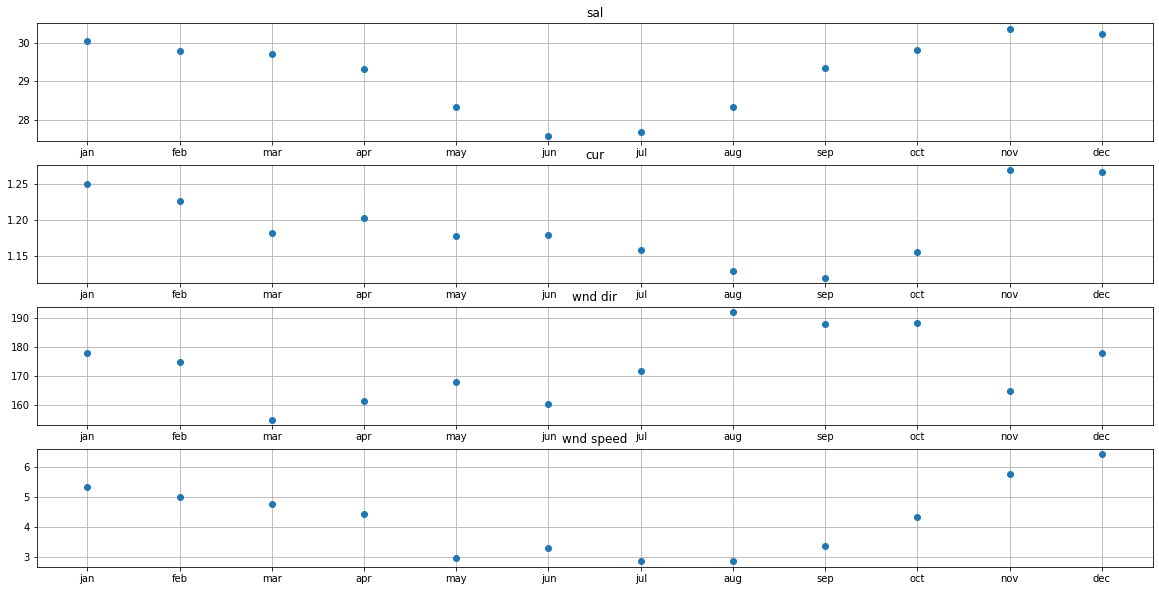

In [27]:
months = np.array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
fig, ax = plt.subplots(4,1, figsize = (20,10))
ax[0].plot(months, monthly_sal_avg, 'o')
ax[0].set_title('sal')

ax[1].plot(months, monthly_cur_avg, 'o')
ax[1].set_title('cur')

ax[2].plot(months, monthly_wnd_dir_avg, 'o')
ax[2].set_title('wnd dir');

ax[3].plot(months, monthly_wnd_spd_avg, 'o')
ax[3].set_title('wnd speed');

for ax in ax:
    ax.grid(True);

In [28]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

dates = np.array([datetime.date(2015,1,1) + datetime.timedelta(i) for i in range(1450)])
dates.shape

(1450,)

In [29]:
print("overall mean for salinity = " + str(fulls.mean()))
print("overall mean for current = " + str(fullc.mean()))
print("overall mean for wind dir = " + str(wind_dir2.mean()))
print("overall mean for wind speed = " + str(wind_speed2.mean()))

overall mean for salinity = 29.214157
overall mean for current = 1.1928312
overall mean for wind dir = 173.4288491714636
overall mean for wind speed = 4.281274


In [30]:
wind_dir.min()

0.03438180157493556

In [31]:
wind_dir.max()

359.9907184999596

In [32]:
wnd_dir_avg.min()

84.38895408380951

In [33]:
wnd_dir_avg.max()

275.85775213192227

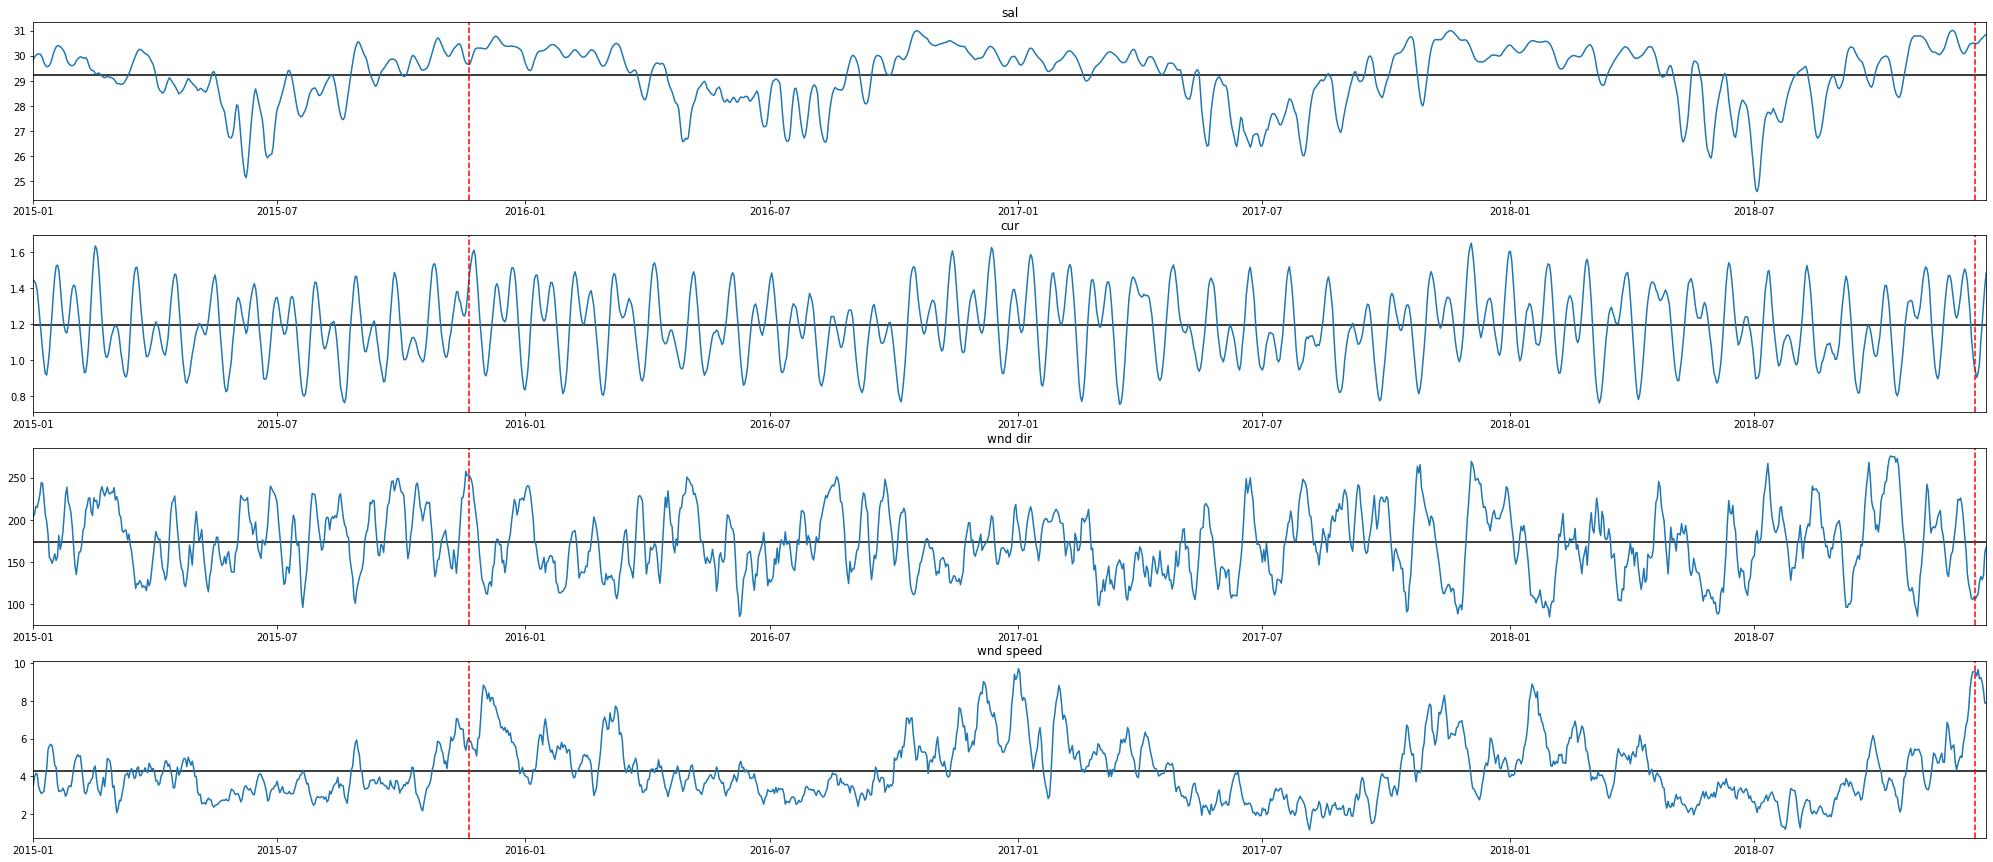

In [34]:
fig, ax = plt.subplots(4,1, figsize = (35,15))
ax[0].plot(dates, sal_avg)
ax[0].set_title('sal')
ax[0].hlines(fulls.mean(), dates[0], dates[-1])

ax[1].plot(dates,cur_avg)
ax[1].hlines(fullc.mean(), dates[0], dates[-1])
ax[1].set_title('cur')

ax[2].plot(dates,wnd_dir_avg)
ax[2].set_title('wnd dir')
ax[2].hlines(wind_dir2.mean(), dates[0], dates[-1])

ax[3].plot(dates,wnd_spd_avg)
ax[3].set_title('wnd speed')
ax[3].hlines(wind_speed2.mean(), dates[0], dates[-1])
for ax in ax:
    ax.set_xlim(dates[0], dates[-1])
    ax.axvline(datetime.date(2015,11,20), color='r', ls='--')
    ax.axvline(datetime.date(2018,12,12), color='r', ls='--');
#fig.savefig('/home/vdo/Pictures/turn-choices.png', bbox_inches='tight');

In [35]:
oct2515 = pickle.load(open('/ocean/vdo/MIDOSS/25oct15.pkl', 'rb'))
jan0716 = pickle.load(open('/ocean/vdo/MIDOSS/07jan16.pkl', 'rb'))
sep3016 = pickle.load(open('/ocean/vdo/MIDOSS/30sep16.pkl', 'rb'))
oct1017 = pickle.load(open('/ocean/vdo/MIDOSS/10oct17.pkl', 'rb'))
jan1018 = pickle.load(open('/ocean/vdo/MIDOSS/10jan18.pkl', 'rb'))
nov1518 = pickle.load(open('/ocean/vdo/MIDOSS/15nov18.pkl', 'rb'))

In [36]:
oct2515['tp_wcc'].shape

(3408,)

In [37]:
wcc_avg = np.array([])
swh_avg = np.array([])
mwp_avg = np.array([])
for i in range(int(oct2515['tp_wcc'].shape[0]/48 - 7)):
    start = 48*i
    end = start + 336
    wcc_avg = np.append(wcc_avg, oct2515['tp_wcc'][start:end].mean())
    swh_avg = np.append(swh_avg, oct2515['tp_swh'][start:end].mean())
    mwp_avg = np.append(mwp_avg, oct2515['tp_mwp'][start:end].mean())

In [38]:
wcc_avg.shape

(64,)

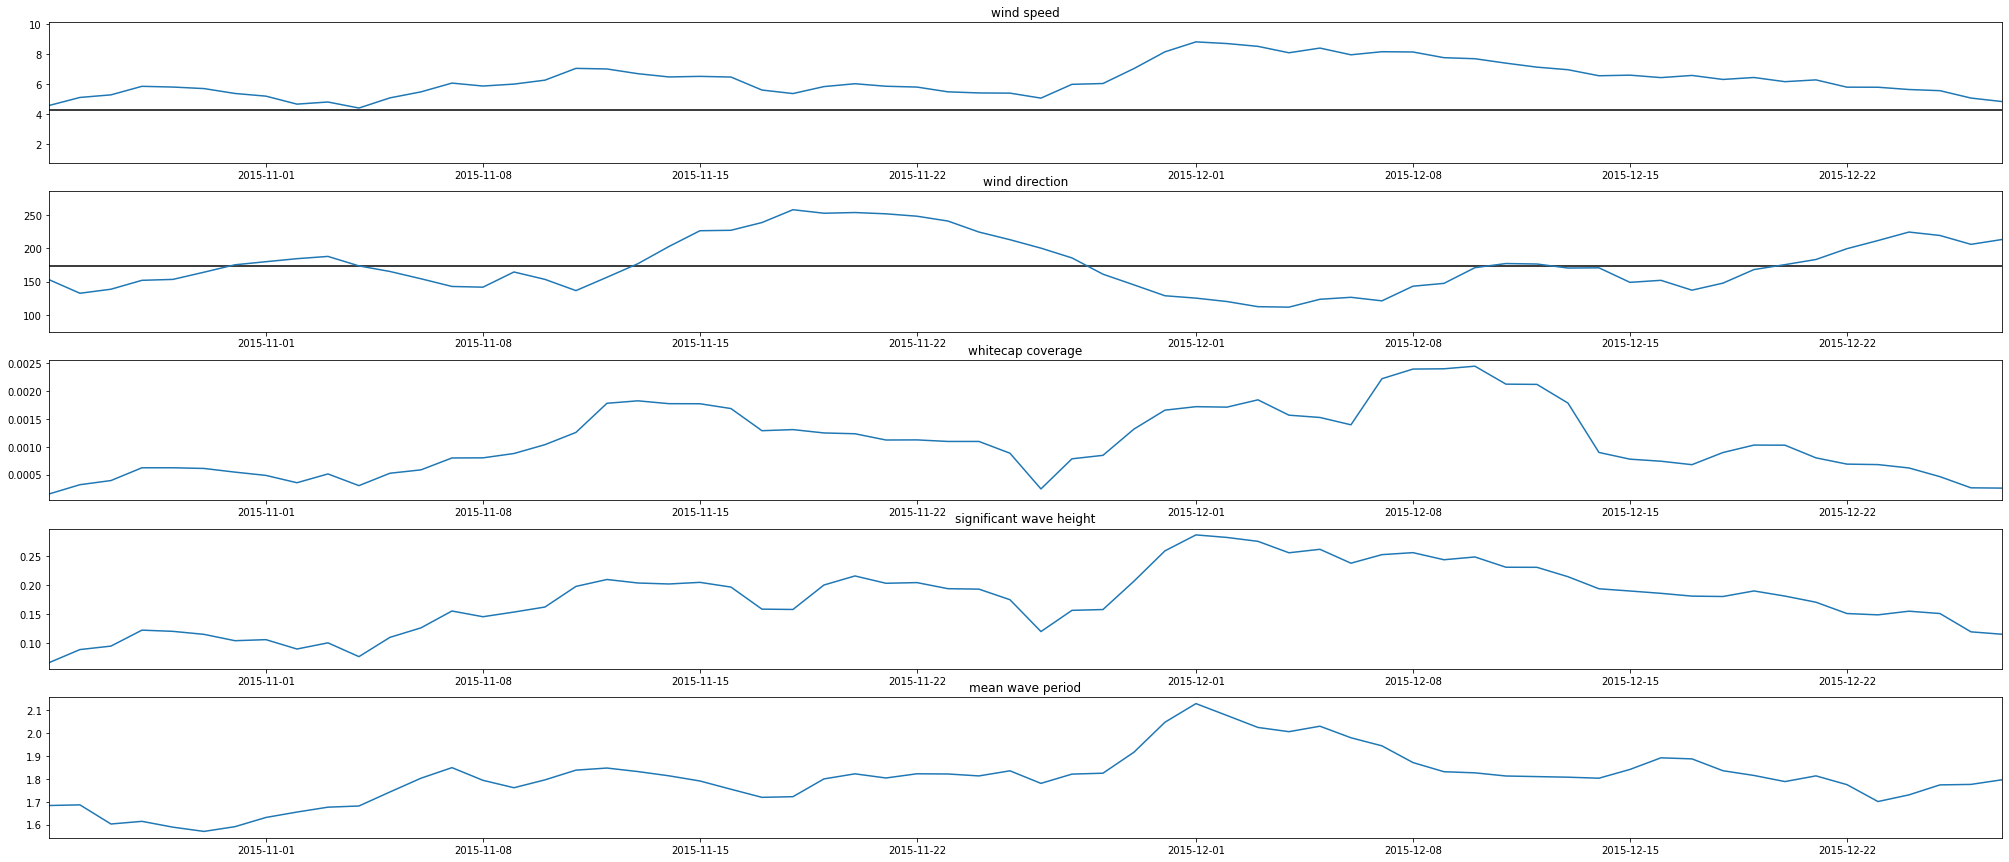

In [39]:
fig, ax = plt.subplots(5,1, figsize = (35,15))

dates2 = [datetime.date(2015,10,25) + datetime.timedelta(days = i) for i in range(64)]

ax[0].plot(dates,wnd_spd_avg)
ax[0].hlines(wind_speed2.mean(), dates2[0], dates2[-1])
ax[0].set_title('wind speed')

ax[1].plot(dates,wnd_dir_avg)
ax[1].hlines(wind_dir2.mean(), dates2[0], dates2[-1])
ax[1].set_title('wind direction')

ax[2].plot(dates2, wcc_avg)
ax[2].set_title('whitecap coverage')

ax[3].plot(dates2, swh_avg)
ax[3].set_title('significant wave height')

ax[4].plot(dates2, mwp_avg)
ax[4].set_title('mean wave period')


for a in ax:
    a.set_xlim(dates2[0], dates2[-1]);

In [40]:
wcc_avg = np.array([])
swh_avg = np.array([])
mwp_avg = np.array([])
for i in range(int(jan0716['tp_wcc'].shape[0]/48 - 7)):
    start = 48*i
    end = start + 336
    wcc_avg = np.append(wcc_avg, jan0716['tp_wcc'][start:end].mean())
    swh_avg = np.append(swh_avg, jan0716['tp_swh'][start:end].mean())
    mwp_avg = np.append(mwp_avg, jan0716['tp_mwp'][start:end].mean())
    
wcc_avg.shape

(73,)

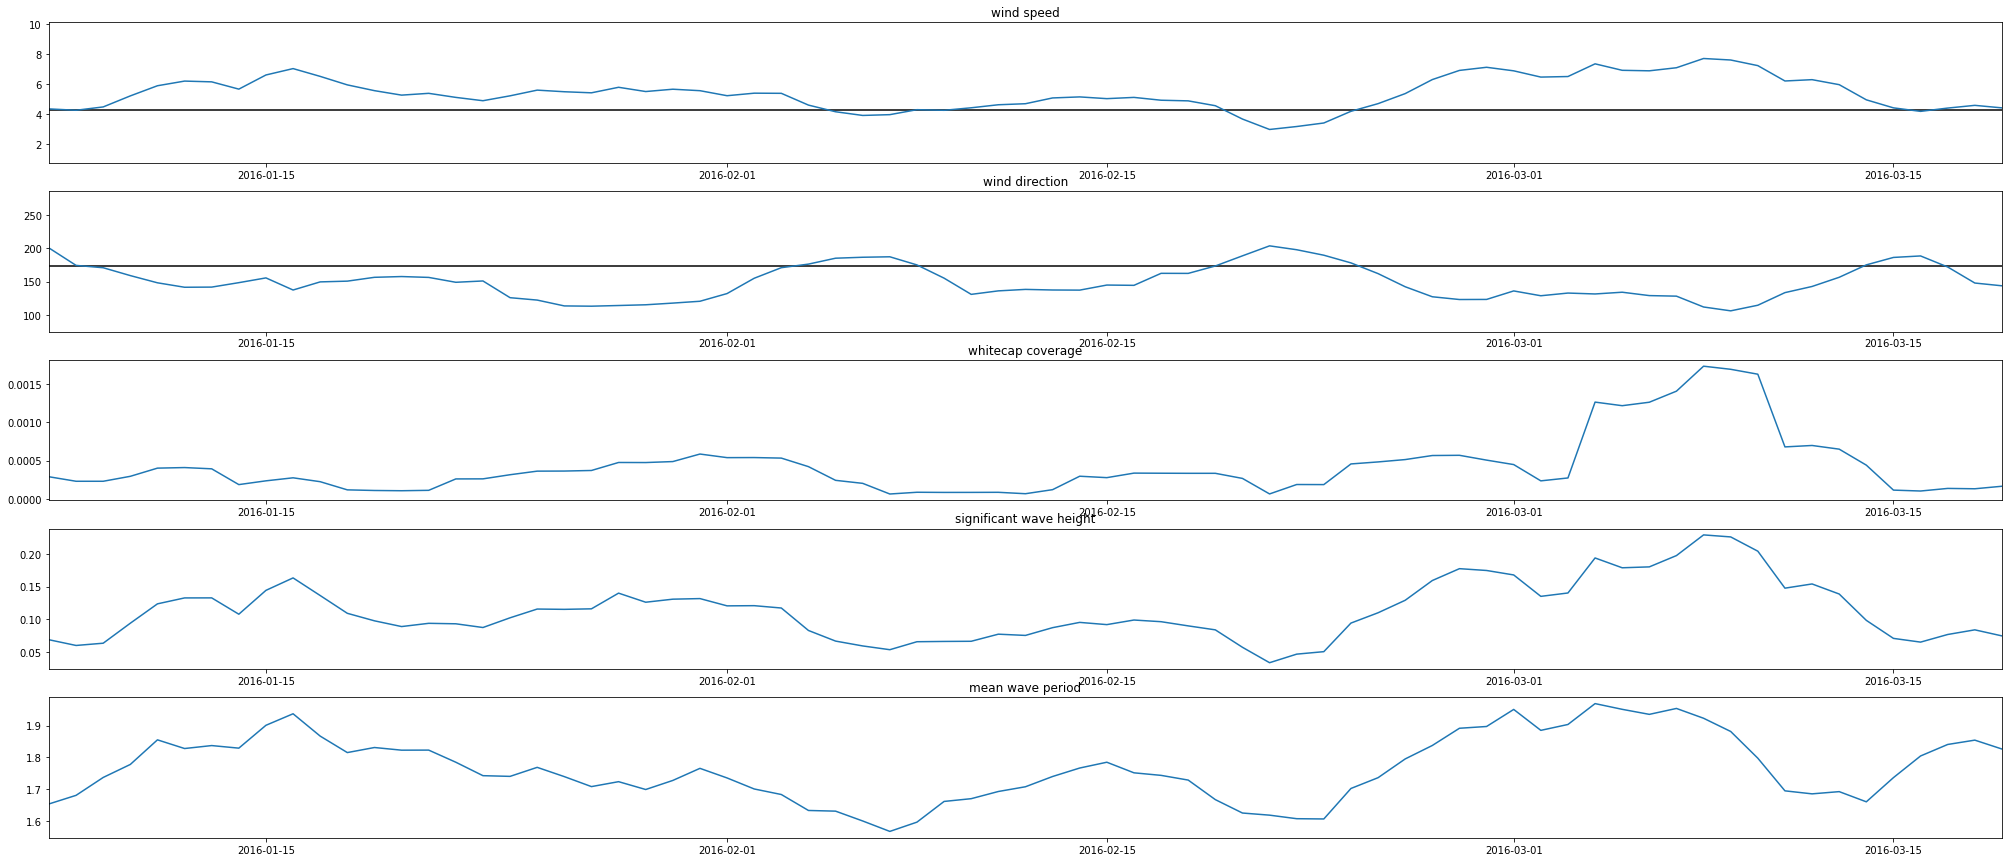

In [41]:
fig, ax = plt.subplots(5,1, figsize = (35,15))

dates2 = [datetime.date(2016,1,7) + datetime.timedelta(days = i) for i in range(73)]

ax[0].plot(dates,wnd_spd_avg)
ax[0].hlines(wind_speed2.mean(), dates2[0], dates2[-1])
ax[0].set_title('wind speed')

ax[1].plot(dates,wnd_dir_avg)
ax[1].hlines(wind_dir2.mean(), dates2[0], dates2[-1])
ax[1].set_title('wind direction')

ax[2].plot(dates2, wcc_avg)
ax[2].set_title('whitecap coverage')

ax[3].plot(dates2, swh_avg)
ax[3].set_title('significant wave height')

ax[4].plot(dates2, mwp_avg)
ax[4].set_title('mean wave period')

for a in ax:
    a.set_xlim(dates2[0], dates2[-1]);

In [42]:
wcc_avg = np.array([])
swh_avg = np.array([])
mwp_avg = np.array([])
for i in range(int(sep3016['tp_wcc'].shape[0]/48 - 7)):
    start = 48*i
    end = start + 336
    wcc_avg = np.append(wcc_avg, sep3016['tp_wcc'][start:end].mean())
    swh_avg = np.append(swh_avg, sep3016['tp_swh'][start:end].mean())
    mwp_avg = np.append(mwp_avg, sep3016['tp_swh'][start:end].mean())
wcc_avg.shape

(143,)

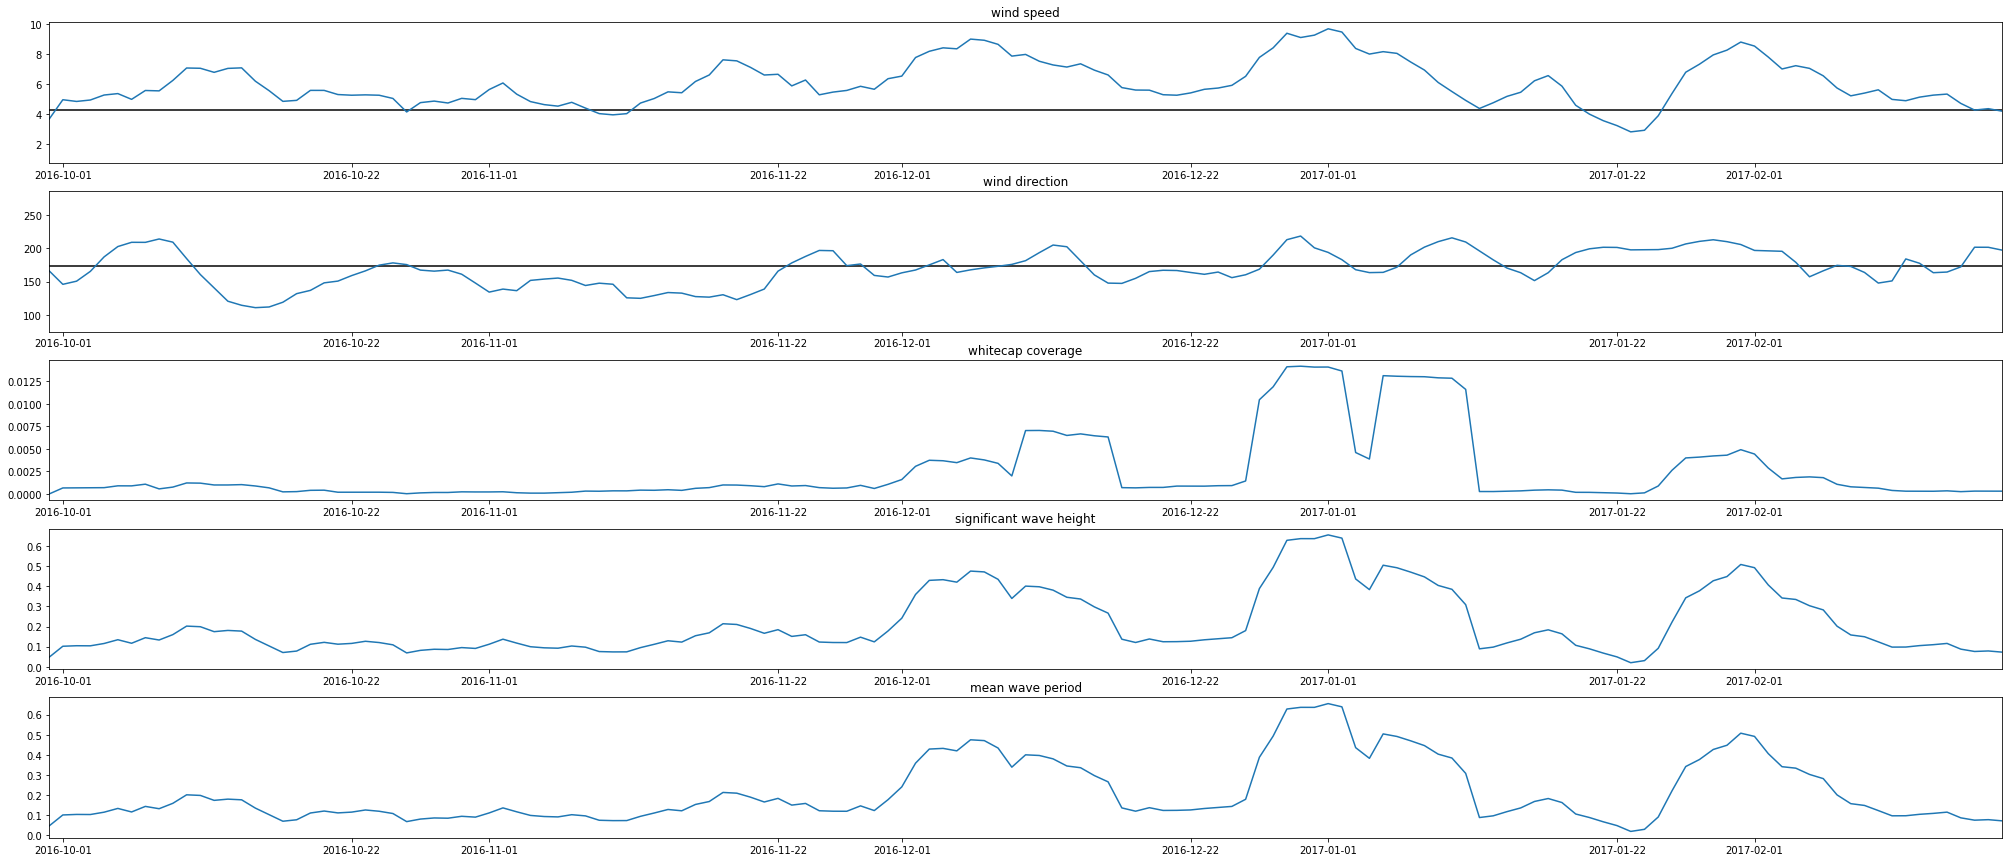

In [43]:
fig, ax = plt.subplots(5,1, figsize = (35,15))

dates2 = [datetime.date(2016,9,30) + datetime.timedelta(days = i) for i in range(143)]

ax[0].plot(dates,wnd_spd_avg)
ax[0].hlines(wind_speed2.mean(), dates2[0], dates2[-1])
ax[0].set_title('wind speed')

ax[1].plot(dates,wnd_dir_avg)
ax[1].hlines(wind_dir2.mean(), dates2[0], dates2[-1])
ax[1].set_title('wind direction')

ax[2].plot(dates2, wcc_avg)
ax[2].set_title('whitecap coverage')

ax[3].plot(dates2, swh_avg)
ax[3].set_title('significant wave height')

ax[4].plot(dates2, mwp_avg)
ax[4].set_title('mean wave period')

for a in ax:
    a.set_xlim(dates2[0], dates2[-1]);

In [44]:
wcc_avg = np.array([])
swh_avg = np.array([])
mwp_avg = np.array([])
for i in range(int(oct1017['tp_wcc'].shape[0]/48 - 7)):
    start = 48*i
    end = start + 336
    wcc_avg = np.append(wcc_avg, oct1017['tp_wcc'][start:end].mean())
    swh_avg = np.append(swh_avg, oct1017['tp_swh'][start:end].mean())
    mwp_avg = np.append(mwp_avg, oct1017['tp_mwp'][start:end].mean())
    
wcc_avg.shape

(56,)

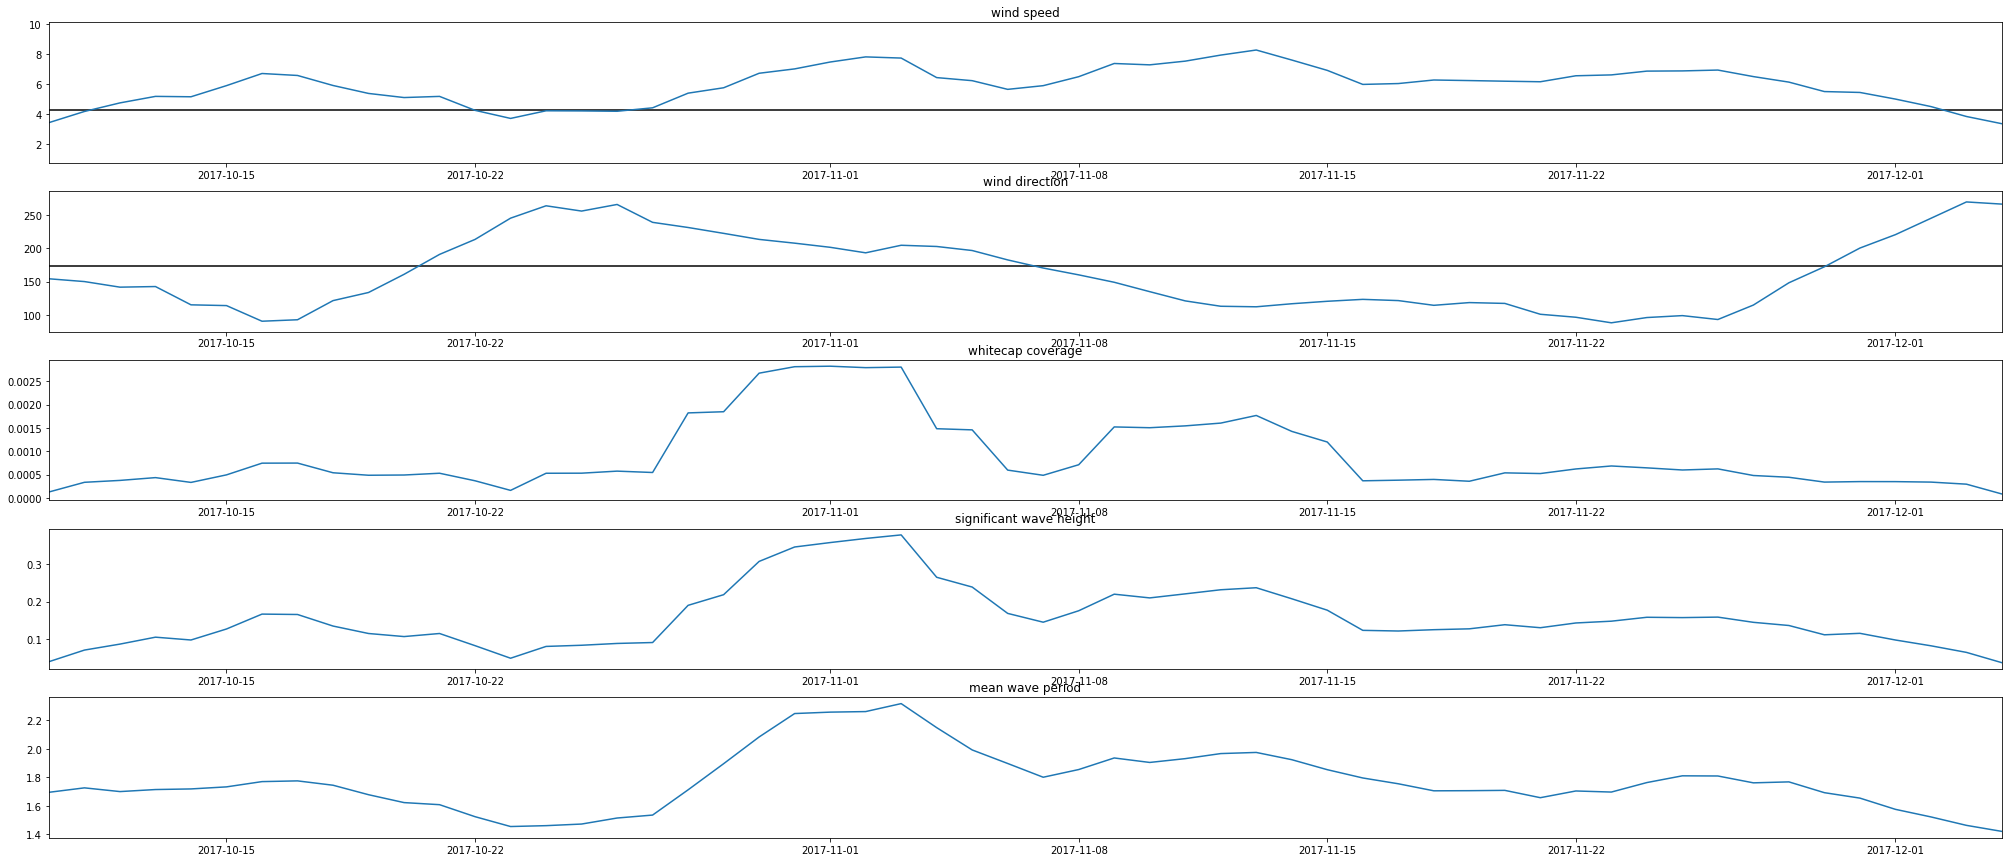

In [45]:
fig, ax = plt.subplots(5,1, figsize = (35,15))

dates2 = [datetime.date(2017,10,10) + datetime.timedelta(days = i) for i in range(56)]

ax[0].plot(dates,wnd_spd_avg)
ax[0].hlines(wind_speed2.mean(), dates2[0], dates2[-1])
ax[0].set_title('wind speed')

ax[1].plot(dates,wnd_dir_avg)
ax[1].hlines(wind_dir2.mean(), dates2[0], dates2[-1])
ax[1].set_title('wind direction')

ax[2].plot(dates2, wcc_avg)
ax[2].set_title('whitecap coverage')

ax[3].plot(dates2, swh_avg)
ax[3].set_title('significant wave height')

ax[4].plot(dates2, mwp_avg)
ax[4].set_title('mean wave period')

for a in ax:
    a.set_xlim(dates2[0], dates2[-1]);

In [46]:
wcc_avg = np.array([])
swh_avg = np.array([])
mwp_avg = np.array([])
for i in range(int(jan1018['tp_wcc'].shape[0]/48 - 7)):
    start = 48*i
    end = start + 336
    wcc_avg = np.append(wcc_avg, jan1018['tp_wcc'][start:end].mean())
    swh_avg = np.append(swh_avg, jan1018['tp_swh'][start:end].mean())
    mwp_avg = np.append(mwp_avg, jan1018['tp_mwp'][start:end].mean())
    
wcc_avg.shape

(50,)

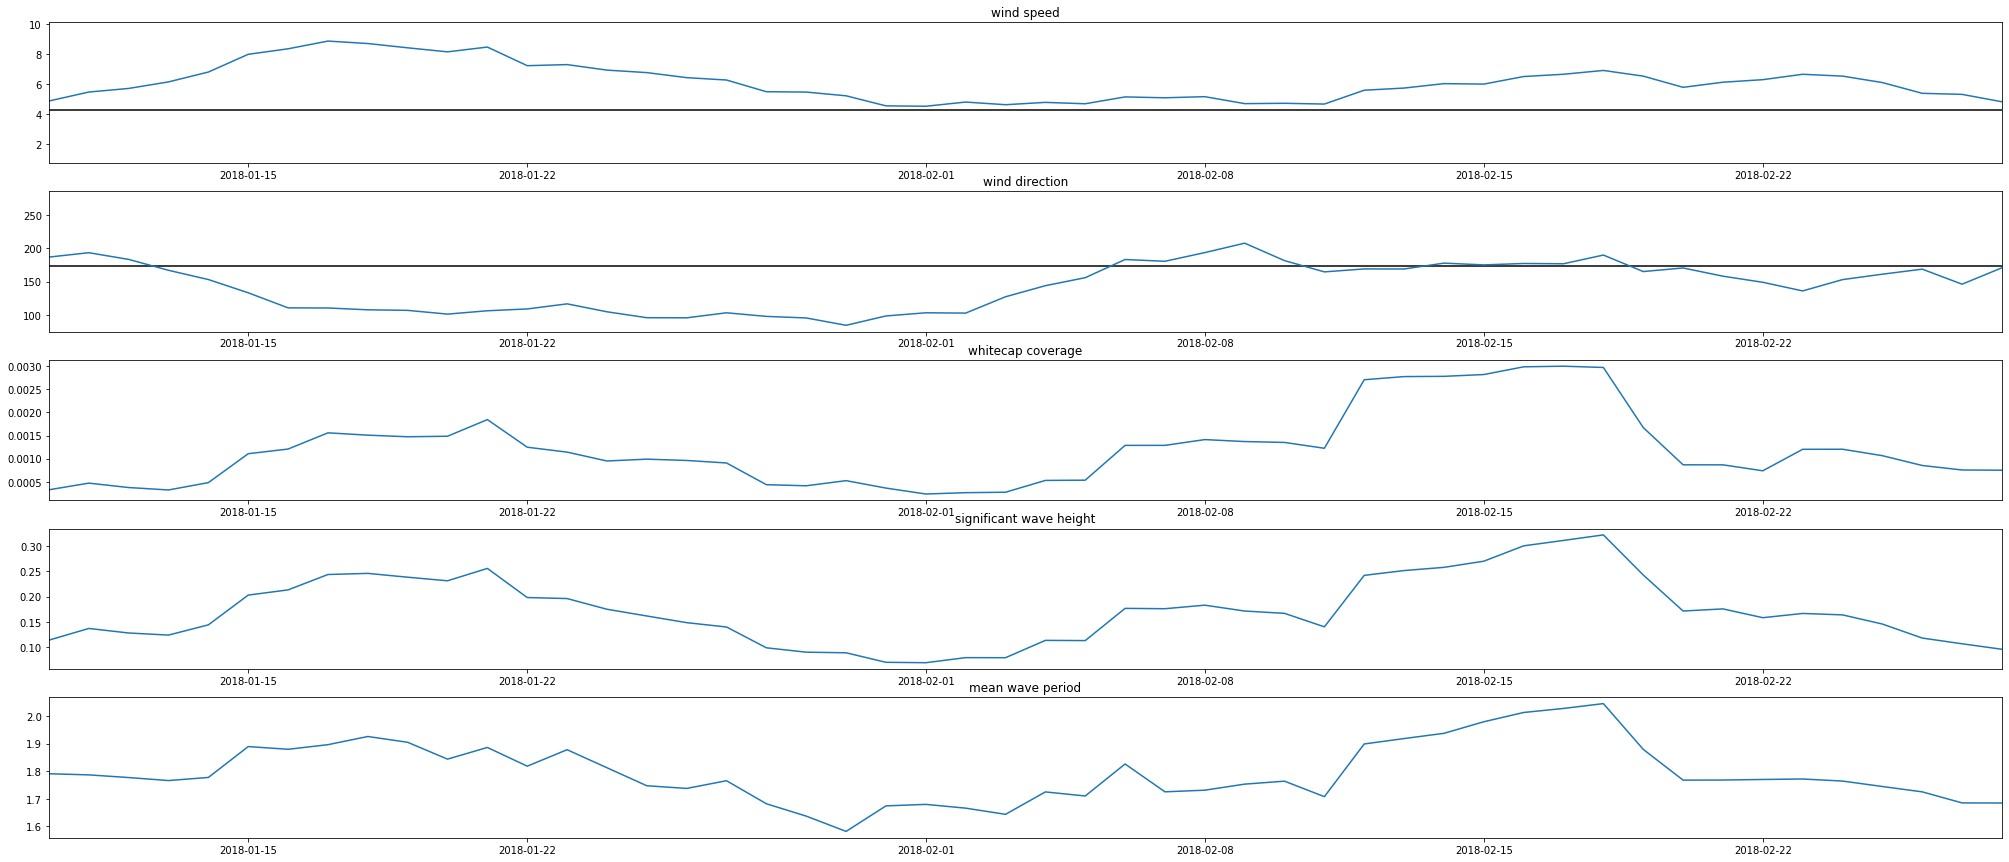

In [47]:
fig, ax = plt.subplots(5,1, figsize = (35,15))

dates2 = [datetime.date(2018,1,10) + datetime.timedelta(days = i) for i in range(50)]

ax[0].plot(dates,wnd_spd_avg)
ax[0].hlines(wind_speed2.mean(), dates2[0], dates2[-1])
ax[0].set_title('wind speed')

ax[1].plot(dates,wnd_dir_avg)
ax[1].hlines(wind_dir2.mean(), dates2[0], dates2[-1])
ax[1].set_title('wind direction')

ax[2].plot(dates2, wcc_avg)
ax[2].set_title('whitecap coverage')

ax[3].plot(dates2, swh_avg)
ax[3].set_title('significant wave height')

ax[4].plot(dates2, mwp_avg)
ax[4].set_title('mean wave period')

for a in ax:
    a.set_xlim(dates2[0], dates2[-1]);

In [48]:
wcc_avg = np.array([])
swh_avg = np.array([])
mwp_avg = np.array([])
for i in range(int(nov1518['tp_wcc'].shape[0]/48 - 7)):
    start = 48*i
    end = start + 336
    wcc_avg = np.append(wcc_avg, nov1518['tp_wcc'][start:end].mean())
    swh_avg = np.append(swh_avg, nov1518['tp_swh'][start:end].mean())
    mwp_avg = np.append(mwp_avg, nov1518['tp_mwp'][start:end].mean())
wcc_avg.shape

(46,)

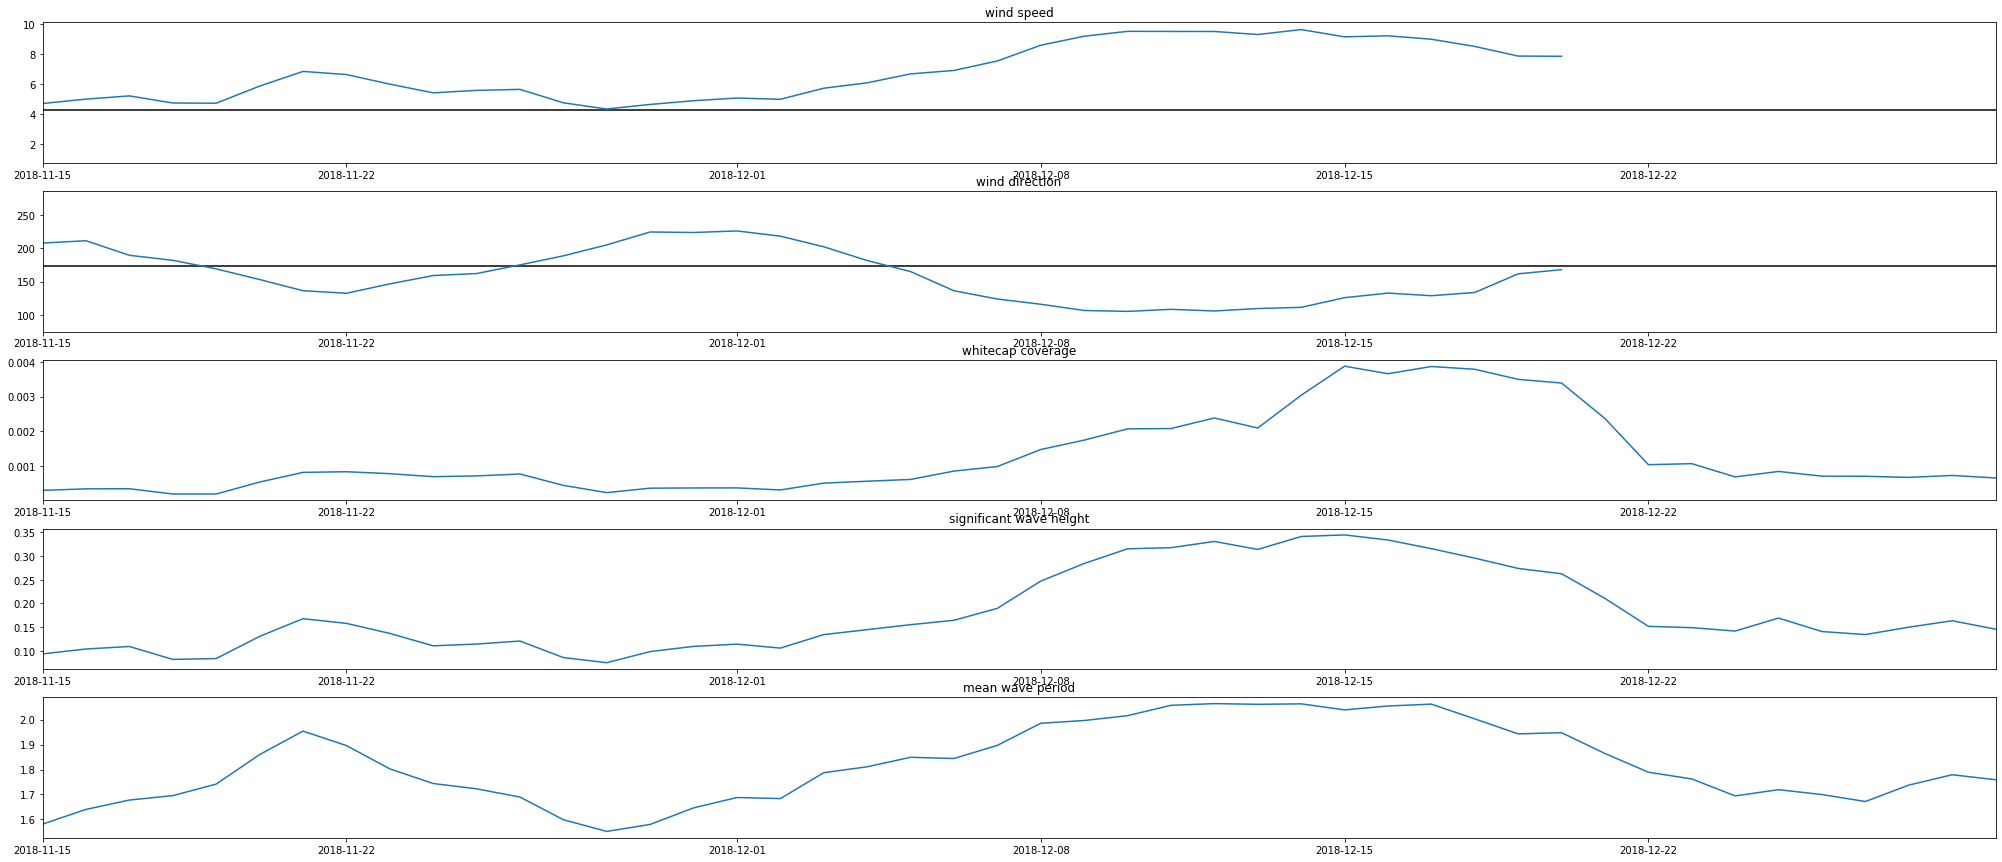

In [49]:
fig, ax = plt.subplots(5,1, figsize = (35,15))

dates2 = [datetime.date(2018,11,15) + datetime.timedelta(days = i) for i in range(46)]

ax[0].plot(dates,wnd_spd_avg)
ax[0].hlines(wind_speed2.mean(), dates2[0], dates2[-1])
ax[0].set_title('wind speed')

ax[1].plot(dates,wnd_dir_avg)
ax[1].hlines(wind_dir2.mean(), dates2[0], dates2[-1])
ax[1].set_title('wind direction')

ax[2].plot(dates2, wcc_avg)
ax[2].set_title('whitecap coverage')

ax[3].plot(dates2, swh_avg)
ax[3].set_title('significant wave height')

ax[4].plot(dates2, mwp_avg)
ax[4].set_title('mean wave period')

for a in ax:
    a.set_xlim(dates2[0], dates2[-1]);

geo_tools.find_closest_model_point(-122.97, 48.77, 
                                   (np.reshape(f['longitude'][:], (1,572)) * np.ones((661,572)))-360,
                                  np.reshape(f['latitude'][:], (661,1)) * np.ones((661,572)))